# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.096901e+01     8.310665e+00
 * time: 0.003219127655029297
     1     2.975422e+01     6.181262e+00
 * time: 0.009757041931152344
     2     1.716154e+01     2.788864e+00
 * time: 0.02949213981628418
     3     1.346557e+01     1.535687e+00
 * time: 0.04461312294006348
     4     1.236394e+01     9.940133e-01
 * time: 0.05973100662231445
     5     1.183065e+01     7.971165e-01
 * time: 0.07176399230957031
     6     1.162743e+01     1.293858e+00
 * time: 0.08365702629089355
     7     1.131528e+01     8.888303e-01
 * time: 0.09567403793334961
     8     1.104029e+01     6.344202e-01
 * time: 0.10762214660644531
     9     1.080525e+01     6.868247e-01
 * time: 0.1195521354675293
    10     1.062924e+01     6.195762e-01
 * time: 0.13164997100830078
    11     1.044075e+01     6.826650e-01
 * time: 0.14392995834350586
    12     1.032077e+01     6.667813e-01
 * time: 0.15352106094360352
    13     1.012910e+01     5.762102e-01
 * time

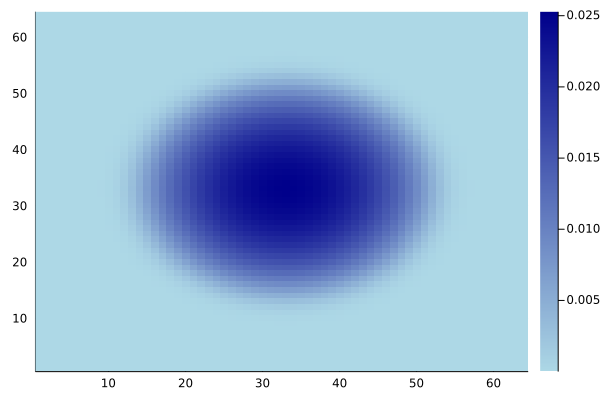

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)